In [1]:
# import zipfile
# with zipfile.ZipFile('data/movie_data.zip', 'r') as zipf:
#     zipf.extractall(path='data/movie_data_extracted')

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Download the data from the above link. How many ".csv" files are available in the dataset?

In [37]:
movies = pd.read_csv('data/movie_data_extracted/movies.csv')
ratings = pd.read_csv('data/movie_data_extracted/ratings.csv')
links = pd.read_csv('data/movie_data_extracted/links.csv')
tags = pd.read_csv('data/movie_data_extracted/tags.csv')

## 2. What is the shape of "movies.csv"?


In [38]:
movies.shape

(9742, 3)

## 3. What is the shape of "ratings.csv"?


In [39]:
ratings.shape

(100836, 4)

## 4. How many unique "userId" are available in "ratings.csv"?


In [40]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [41]:
len(ratings.userId.unique())

610

## 5. Which movie has recieved maximum number of user ratings?


In [42]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [44]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [43]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [69]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [46]:
ratings_mid = ratings.groupby('movieId')

In [47]:
ratings_mid.count().sort_values(by='rating', ascending=False)

,userId,rating,timestamp
movieId,,,
356,329,329,329
318,317,317,317
296,307,307,307
593,279,279,279
2571,278,278,278
...,...,...,...
4093,1,1,1
4089,1,1,1
58351,1,1,1


In [48]:
movies[movies['movieId'] == 356]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


## 6. Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [49]:
movies.loc[movies['title']=='Matrix, The (1999)']

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [50]:
tags[tags['movieId'] == 2571]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


## 7. What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [51]:
movies.loc[movies['title']=='Terminator 2: Judgment Day (1991)']

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [52]:
ratings[ratings['movieId']==589]['rating'].mean()

3.970982142857143

## 8. How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [53]:
movies.loc[movies['title']=='Fight Club (1999)']

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [67]:
ratings[ratings['movieId']==2959]

,userId,movieId,rating,timestamp
192,1,2959,5.0,964983282
458,4,2959,2.0,945078528
1134,10,2959,0.5,1455356582
1479,15,2959,2.5,1510571747
1635,16,2959,3.5,1377476874
...,...,...,...,...
95893,601,2959,5.0,1441639461
96788,603,2959,4.0,963176105
97835,606,2959,5.0,1171231517
99107,608,2959,5.0,1117336631


In [63]:
fight_club_ratings = ratings[ratings['movieId']==2959]['rating']

<Axes: xlabel='rating'>

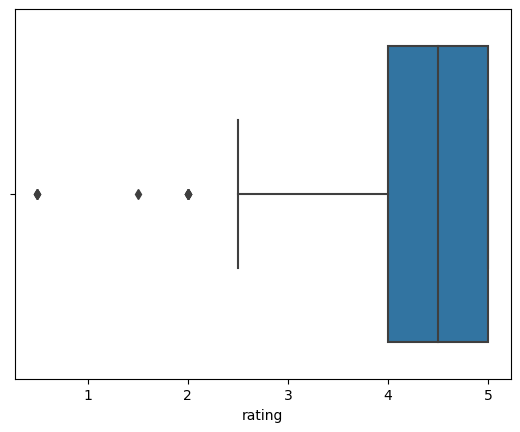

In [64]:
sns.boxplot(x=fight_club_ratings)

<Axes: xlabel='rating', ylabel='Density'>

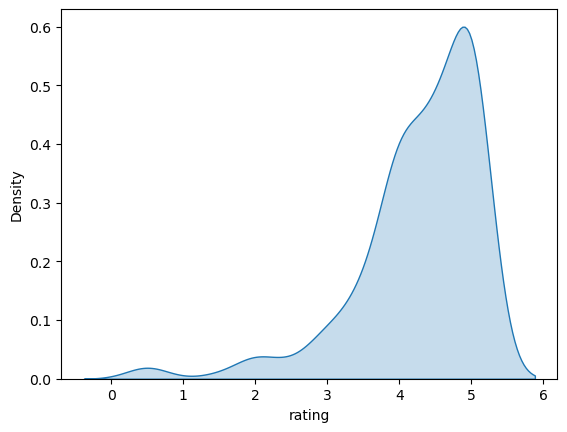

In [65]:
sns.kdeplot(fight_club_ratings, fill=True)

# 🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

### Step - 1

In [91]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [103]:
ratings_mids = ratings.groupby('movieId')

In [110]:
ratings_mids.rating.count()

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64

In [111]:
ratings_mids.rating.mean()

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [112]:
ratings

,userId,movieId,rating,timestamp,rating_counts,rating_mean
0,1,1,4.0,964982703,NaN,NaN
1,1,3,4.0,964981247,215.0,3.920930
2,1,6,4.0,964982224,110.0,3.431818
3,1,47,5.0,964983815,52.0,3.259615
4,1,50,5.0,964982931,7.0,2.357143
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,NaN,NaN
100832,610,168248,5.0,1493850091,NaN,NaN
100833,610,168250,5.0,1494273047,NaN,NaN
100834,610,168252,5.0,1493846352,NaN,NaN


In [106]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [115]:
grouped_ratings = ratings.groupby('movieId').agg({'rating': ['count', 'mean']})

# Flatten the multi-level column index
grouped_ratings.columns = ['_'.join(col).strip() for col in grouped_ratings.columns.values]

# Reset index for a cleaner output
grouped_ratings.reset_index(inplace=True)

      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8287   106782   Wolf of Wall Street, The (2013)   
8354   109374  Grand Budapest Hotel, The (2014)   
8358   109487               Interstellar (2014)   
8457   112852    Guardians of the Galaxy (2014)   
8673   122904                   Deadpool (2016)   

                                           genres  rating_count  rating_mean  
0     Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                      Adventure|Children|Fantasy           110     3.431818  
2                                  Comedy|Romance            52     3.259615  
5                           Action|Crime|Thriller           102     3.9

### Step - 2

In [117]:
# Inner join on data frames created from movies.csv and the grouped ratings data frame
merged_df = pd.merge(movies, grouped_ratings, on='movieId', how='inner')

# Filter only those movies which have more than 50 user ratings
filtered_df = merged_df[merged_df['rating_count'] > 50]


In [118]:
filtered_df

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


### 9. Which movie is the most popular based on  average user ratings?
*
Answer this question only after applying the above mentioned "Mandatory Operration".

- Godfather, The (1972)
- Shawshank Redemption, The (1994)
- Jumanji (1995)
- Wolf of Wall Street, The (2013)

In [125]:
filtered_df[filtered_df['rating_mean']==filtered_df.rating_mean.max()]

,movieId,title,genres,rating_count,rating_mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


## 10. Select all the correct options which comes under top 5 popular movies based on number of user ratings.
- **Answer this question only after applying the above mentioned "Mandatory Operration".**

- Pulp Fiction (1994)
- Bad Boys (1995)
- Silence of the Lambs, The (1991)
- Matrix, The (1999)

In [140]:
filtered_df['rating_count'].sort_values(ascending=False).head()

314     329
277     317
257     307
510     279
1938    278
Name: rating_count, dtype: int64

In [142]:
filtered_df.loc[[314, 277, 257, 510, 1938]]

,movieId,title,genres,rating_count,rating_mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


## 11. Which Sci-Fi movie is "third most popular" based on the number of user ratings?
* Answer this question only after applying the above mentioned "Mandatory Operration".

- Deadpool (2016)
- Terminator 2: Judgment Day (1991)
- X-Men: The Last Stand (2006)
- Jurassic Park (1993)

In [146]:
filtered_df.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Action|Crime|Thriller', 'Action|Adventure|Thriller',
       'Comedy|Drama|Romance', 'Crime|Drama', 'Drama|Romance', 'Comedy',
       'Comedy|Crime|Thriller', 'Mystery|Sci-Fi|Thriller',
       'Children|Drama', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Drama', 'Action|Comedy|Horror|Thriller',
       'Action|Drama|War', 'Crime|Drama|Thriller',
       'Action|Comedy|Crime|Drama|Thriller', 'Adventure|Drama|IMAX',
       'Action|Adventure|Comedy|Crime', 'Adventure|Children',
       'Action|Adventure|Mystery|Sci-Fi', 'Drama|Thriller|War',
       'Action|Romance|Western', 'Action|Drama|Romance',
       'Action|Sci-Fi|Thriller', 'Action|Crime|Sci-Fi',
       'Action|Adventure|Sci-Fi', 'Drama|Thriller', 'Adventure|Comedy',
       'Comedy|Drama', 'Drama|Horror', 'Drama|Romance|War|Western',
       'Action|Drama|Sci-Fi|

In [153]:
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

In [161]:
sci_fi_movies['rating_count'].sort_values(ascending=False)

1938    278
224     251
418     238
507     224
897     211
       ... 
8673     54
144      53
2028     53
559      53
6192     52
Name: rating_count, Length: 88, dtype: int64

In [162]:
sci_fi_movies.loc[418]

movieId                                      480
title                       Jurassic Park (1993)
genres          Action|Adventure|Sci-Fi|Thriller
rating_count                                 238
rating_mean                                 3.75
Name: 418, dtype: object

# 🟢 IMPORTANT NOTE 2 🟢
You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

If you are unable to write the webscraping script yourself, you can request the same by commenting LinkedIn Post.

In [163]:
filtered_df

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [165]:
# import zipfile
# with zipfile.ZipFile('data/scrapper.zip', 'r') as zipf:
#     zipf.extractall(path='data/scrapper_extracted')

In [187]:
import requests
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'class': 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan


In [188]:
id = '114709'
n_zeroes = 7 - len(id)
new_id = "0"*n_zeroes + id
URL = f"https://www.imdb.com/title/tt{new_id}/"
request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36', 
                      'Accept-Encoding': 'gzip, deflate, br'}
response = requests.get(URL, headers=request_header)

In [189]:
new_id

'0114709'

In [190]:
soup = BeautifulSoup(response.text, 'html.parser')
soup

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1704535297558);
        }
    })</script><title>Toy Story (1995) - IMDb</title><meta content="Toy Story: Directed by John Lasseter. With Tom Hanks, Tim Allen, Don Rickles, Jim Varney. A cowboy doll is profoundly threatened and jealous when a new spaceman action figure supplants him as top toy in a boy's bedroom

In [191]:
imd_rating = soup.find('span', attrs={'class': 'FILL_IN_THE_BLANK'})

In [192]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [193]:
imdb_df = pd.merge(filtered_df, links, how='inner', on=['movieId', 'movieId'])

In [194]:
imdb_df.head()

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0


In [196]:
from tqdm import tqdm, tqdm_notebook

In [197]:
tqdm.pandas()

In [198]:
imdb_df['imdb_rating'] = imdb_df['imdbId'].progress_apply(lambda x: scrapper(x))

100%|████████████████████████████████████████████████████████████████████████████████| 436/436 [17:11<00:00,  2.37s/it]


In [199]:
imdb_df

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId,imdb_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,7.1
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.6
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,8.3
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0,8.2
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0,8.1
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,8.0


In [201]:
imdb_df.imdb_rating

0      8.3
1      7.1
2      6.6
3      8.3
4      6.3
      ... 
431    8.2
432    8.1
433    8.7
434    8.0
435    8.0
Name: imdb_rating, Length: 436, dtype: object

## 12. Mention the movieId of the movie which has the highest IMDB rating.

In [203]:
imdb_df['imdb_rating'].sort_values(ascending=False)

53     9.3
117    9.2
86     9.0
364    9.0
146    9.0
      ... 
73     5.4
30     5.3
260    4.9
18     NaN
377    NaN
Name: imdb_rating, Length: 436, dtype: object

In [204]:
imdb_df.loc[53]

movieId                                      318
title           Shawshank Redemption, The (1994)
genres                               Crime|Drama
rating_count                                 317
rating_mean                             4.429022
imdbId                                    111161
tmdbId                                     278.0
imdb_rating                                  9.3
Name: 53, dtype: object

## 13. Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [207]:
sci_fi_imdb_movies = imdb_df[imdb_df['genres'].str.contains('Sci-Fi')]


In [208]:
sci_fi_imdb_movies['rating_count'].sort_values(ascending=False)

248    278
44     251
80     238
96     224
140    211
      ... 
435     54
35      53
260     53
107     53
386     52
Name: rating_count, Length: 88, dtype: int64

In [209]:
sci_fi_imdb_movies.loc[248]

movieId                           2571
title               Matrix, The (1999)
genres          Action|Sci-Fi|Thriller
rating_count                       278
rating_mean                   4.192446
imdbId                          133093
tmdbId                           603.0
imdb_rating                        8.7
Name: 248, dtype: object